In [350]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# I. Explore the dataset. 

In [351]:
transactions  = pd.read_csv('transactions.csv', sep=';', parse_dates=True)
train = pd.read_csv('train_set.csv', sep=';')
codes = pd.read_csv('codes.csv', sep=';')
types = pd.read_csv('types.csv',sep=';')

In [352]:
f = pd.merge(train,transactions,
                        how="right", on=["client_id"])

In [353]:
yy=f[f['target'].isna()]
yy = yy.drop_duplicates(subset = ["client_id"])
yy

,client_id,target,datetime,code,type,sum
1,24567813,NaN,377 17:20:40,6011,7010,67377.47
3,14331004,NaN,263 12:57:08,6011,2010,-3368873.66
9,48933372,NaN,157 15:22:24,5921,1010,-7703.49
...,...,...,...,...,...,...
128586,44107368,NaN,445 15:22:37,4814,1030,-673.77
129496,54180380,NaN,83 00:00:00,5921,1110,-1190.34
129642,12610287,NaN,165 11:16:38,6011,2010,-224591.58


In [354]:
transactions['day'] = transactions['datetime'].apply(lambda day: day.split(' ')[0])
yy['day'] = yy['datetime'].apply(lambda day: day.split(' ')[0])

transactions['time'] = transactions['datetime'].apply(lambda day: day.split(' ')[1])
yy['time'] = yy['datetime'].apply(lambda day: day.split(' ')[1])

transactions['time'] = pd.to_datetime(transactions['time'],format= '%H:%M:%S' ).dt.time
transactions['hour']=transactions['time'].apply(lambda hour:hour.hour)
transactions=pd.merge(transactions, train, how ='left', on ='client_id')
transactions.dropna(inplace=True)
transactions

,client_id,datetime,code,type,sum,day,time,hour,target
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,6,0.0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,13,0.0
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,10,0.0
...,...,...,...,...,...,...,...,...,...
130036,40949707,398 21:13:58,5411,1110,-40353.72,398,21:13:58,21,1.0
130037,7174462,409 13:58:14,5411,1010,-25536.06,409,13:58:14,13,1.0
130038,92197764,319 00:00:00,5533,1110,-12127.95,319,00:00:00,0,1.0


In [355]:
transactions[transactions['client_id']==24567813]


,client_id,datetime,code,type,sum,day,time,hour,target


In [356]:
gg=transactions[transactions['target'].isna()]
gg

,client_id,datetime,code,type,sum,day,time,hour,target


In [357]:
transactions.shape

(91826, 9)

In [358]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 130038
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  91826 non-null  int64  
 1   datetime   91826 non-null  object 
 2   code       91826 non-null  int64  
 3   type       91826 non-null  int64  
 4   sum        91826 non-null  float64
 5   day        91826 non-null  object 
 6   time       91826 non-null  object 
 7   hour       91826 non-null  int64  
 8   target     91826 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.0+ MB


In [359]:
transactions.describe()

,client_id,code,type,sum,hour,target
count,9.182600e+04,91826.000000,91826.000000,9.182600e+04,91826.000000,91826.000000
mean,5.169368e+07,5596.441389,2549.483403,-1.666997e+04,11.662220,0.491266
std,2.839945e+07,602.144814,2295.581132,6.232297e+05,6.230136,0.499926
...,...,...,...,...,...,...
50%,5.388370e+07,5661.000000,1110.000000,-5.239160e+03,12.000000,0.000000
75%,7.552189e+07,6010.000000,2370.000000,-1.122960e+03,16.000000,1.000000
max,9.999124e+07,9402.000000,8145.000000,6.737747e+07,23.000000,1.000000


In [360]:
len(transactions.client_id.unique())

6000

In [361]:
main = transactions.drop_duplicates(subset = ["client_id"])
main


,client_id,datetime,code,type,sum,day,time,hour,target
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,6,0.0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,13,0.0
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,10,0.0
...,...,...,...,...,...,...,...,...,...
128243,12289409,108 11:13:33,6011,2010,-132509.03,108,11:13:33,11,0.0
128357,71829751,72 14:50:37,6011,2010,-44918.32,72,14:50:37,14,0.0
128504,91616522,451 10:53:51,6011,2010,-22459.16,451,10:53:51,10,1.0


In [362]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 128504
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  6000 non-null   int64  
 1   datetime   6000 non-null   object 
 2   code       6000 non-null   int64  
 3   type       6000 non-null   int64  
 4   sum        6000 non-null   float64
 5   day        6000 non-null   object 
 6   time       6000 non-null   object 
 7   hour       6000 non-null   int64  
 8   target     6000 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 468.8+ KB


In [363]:
correlation_df = main.corr()
pd.set_option('display.max_rows', correlation_df.shape[0]+1)
print(correlation_df)

           client_id      code      type       sum      hour    target
client_id   1.000000 -0.005844  0.023431  0.019108  0.027898  0.003311
code       -0.005844  1.000000  0.291426  0.026316 -0.078943  0.040264
type        0.023431  0.291426  1.000000  0.250791  0.099584 -0.004794
sum         0.019108  0.026316  0.250791  1.000000  0.007730 -0.018182
hour        0.027898 -0.078943  0.099584  0.007730  1.000000 -0.014174
target      0.003311  0.040264 -0.004794 -0.018182 -0.014174  1.000000


In [364]:
main['time']=main['time'].apply(lambda x: x.strftime('%H%M%S'))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [365]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 128504
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  6000 non-null   int64  
 1   datetime   6000 non-null   object 
 2   code       6000 non-null   int64  
 3   type       6000 non-null   int64  
 4   sum        6000 non-null   float64
 5   day        6000 non-null   object 
 6   time       6000 non-null   object 
 7   hour       6000 non-null   int64  
 8   target     6000 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 468.8+ KB


In [366]:
main

,client_id,datetime,code,type,sum,day,time,hour,target
0,96372458,421 06:33:15,6011,2010,-561478.94,421,063315,6,0.0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,133847,13,0.0
4,85302434,151 10:34:12,4814,1030,-3368.87,151,103412,10,0.0
...,...,...,...,...,...,...,...,...,...
128243,12289409,108 11:13:33,6011,2010,-132509.03,108,111333,11,0.0
128357,71829751,72 14:50:37,6011,2010,-44918.32,72,145037,14,0.0
128504,91616522,451 10:53:51,6011,2010,-22459.16,451,105351,10,1.0


In [367]:
main['time']=main['time'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [368]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 128504
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  6000 non-null   int64  
 1   datetime   6000 non-null   object 
 2   code       6000 non-null   int64  
 3   type       6000 non-null   int64  
 4   sum        6000 non-null   float64
 5   day        6000 non-null   object 
 6   time       6000 non-null   int64  
 7   hour       6000 non-null   int64  
 8   target     6000 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 468.8+ KB


In [369]:
main['type'].astype(str).astype(int)

0         2010
2         2010
4         1030
          ... 
128243    2010
128357    2010
128504    2010
Name: type, Length: 6000, dtype: int64

In [370]:
code_dummies  = pd.get_dummies(main['code'])
main = main.join(code_dummies)


In [371]:
df2 = transactions.groupby('client_id')['sum'].sum()
df2=df2.to_frame()

In [372]:
c=transactions.groupby('client_id').size()
c=c.to_frame()

In [373]:
main

,client_id,datetime,code,type,sum,day,time,hour,target,1711,3000,4111,4112,4121,4214,4511,4722,4789,4812,4814,4816,4829,4899,4900,5039,5099,5199,5200,5211,5231,5251,5261,5300,5311,5331,5399,5411,5422,5441,5451,...,5964,5967,5977,5983,5992,5993,5994,5995,5999,6010,6011,6012,6051,6211,6300,6513,6536,7011,7230,7298,7311,7372,7399,7832,7922,7993,7994,7995,7997,7999,8011,8021,8043,8062,8071,8099,8641,8999,9222,9399
0,96372458,421 06:33:15,6011,2010,-561478.94,421,63315,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,133847,13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,85302434,151 10:34:12,4814,1030,-3368.87,151,103412,10,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128243,12289409,108 11:13:33,6011,2010,-132509.03,108,111333,11,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
128357,71829751,72 14:50:37,6011,2010,-44918.32,72,145037,14,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
128504,91616522,451 10:53:51,6011,2010,-22459.16,451,105351,10,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [374]:
df3=df2.merge(c, how='right', on='client_id')
df3

,sum,0
client_id,,
22899,50847.54,9
27914,74115.21,4
28753,-2589800.29,13
...,...,...
99967537,-336887.37,1
99985917,-224591.58,1
99991245,569609.16,4


In [375]:
df3['average']=(df3['sum'])/(df3[0])
df3

,sum,0,average
client_id,,,
22899,50847.54,9,5649.726667
27914,74115.21,4,18528.802500
28753,-2589800.29,13,-199215.406923
...,...,...,...
99967537,-336887.37,1,-336887.370000
99985917,-224591.58,1,-224591.580000
99991245,569609.16,4,142402.290000


In [376]:
main=main.merge(df3, how='left', on='client_id')
main

,client_id,datetime,code,type,sum_x,day,time,hour,target,1711,3000,4111,4112,4121,4214,4511,4722,4789,4812,4814,4816,4829,4899,4900,5039,5099,5199,5200,5211,5231,5251,5261,5300,5311,5331,5399,5411,5422,5441,5451,...,5983,5992,5993,5994,5995,5999,6010,6011,6012,6051,6211,6300,6513,6536,7011,7230,7298,7311,7372,7399,7832,7922,7993,7994,7995,7997,7999,8011,8021,8043,8062,8071,8099,8641,8999,9222,9399,sum_y,0,average
0,96372458,421 06:33:15,6011,2010,-561478.94,421,63315,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1102812.03,13,-84831.694615
1,21717441,55 13:38:47,6011,2010,-44918.32,55,133847,13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3135792.54,15,-209052.836000
2,85302434,151 10:34:12,4814,1030,-3368.87,151,103412,10,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-101501.02,8,-12687.627500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,12289409,108 11:13:33,6011,2010,-132509.03,108,111333,11,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-132509.03,1,-132509.030000
5998,71829751,72 14:50:37,6011,2010,-44918.32,72,145037,14,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-44918.32,1,-44918.320000
5999,91616522,451 10:53:51,6011,2010,-22459.16,451,105351,10,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22459.16,1,-22459.160000


In [377]:
transac  = pd.read_csv('transactions.csv', sep=';', parse_dates=True)
trainsac = pd.read_csv('train_set.csv', sep=';')
codes = pd.read_csv('codes.csv', sep=';')
types = pd.read_csv('types.csv',sep=';')

In [378]:
f = pd.merge(trainsac,transac,
                        how="left", on=["client_id"])

In [379]:
f

,client_id,target,datetime,code,type,sum
0,75063019,0,397 20:05:07,4814,1030,-4491.83
1,75063019,0,86 20:29:50,6010,7070,4491.83
2,75063019,0,375 16:00:33,4814,1030,-3144.28
...,...,...,...,...,...,...
91823,1846496,0,186 13:38:15,5732,1010,-112273.33
91824,1846496,0,440 16:02:57,6010,7030,168443.68
91825,1846496,0,148 15:56:18,5411,1010,-23634.89


In [380]:
f[f['code']==742]

,client_id,target,datetime,code,type,sum
5696,79610861,0,240 00:00:00,742,1110,-24400.30
11607,76380054,0,71 00:00:00,742,1110,-5772.00
22369,815836,1,307 09:05:59,742,1110,-3368.87


In [381]:
f = f.drop_duplicates(subset = ["code"])
f=f.sort_values('code')
tt=f.code
tt=tt.to_frame()
col_one_list = tt['code'].tolist()

In [382]:
list22=[66.7,0,50,44.4,0,20,50,56.6,40,100,83.3,44.4,100,44.6,60,28.5,65.7,41.5,56.9,31.5,54.1,20.8,52,0,28.6,50,16.7,0,33.3,50,100,50,66.7,66.7,100,100,0,57.1,0,0,54,33.8,62.5,26.3,35.4,47.2,55,60,52.7,53.4,43.4,52.3,46.7,56,22.2,85.7,51,21.2,33.3,16.9,25.9,36.8,0,36,86,86,57.7,74.6,56,65.8,53.8,69.6,100,72.5,58.1,60,72.7,43.3,35.7,31.5,0,27.9,36.9,50,41.2,28.6,40.8,42.8,59.7,36.5,80,0,49.7,60,60.5,55.4,56.8,60,74.5,66.7,92.3,75,73.5,100,7.1,40,0,50,100,0,83.9,24.5,38.3,27.3,60,60.8,50.7,47.8,50.7,32.6,19.5,26.7,66.7,100,46.3,28.2,50,0,50,66,0,0,62.5,52.9,70.6,100,11.1,0,0,44,0,60,20,17.8,0,0,30,50,39.3,25,33.3,14.3,13.6,15.6,50,56.5,45.1,55,67.7,70.8,37.5,100,60.4,100,100,44.4,72.7,0,51,0,0,23.5,0]

In [383]:
df22 = pd.DataFrame(list(zip(col_one_list, list22)),
               columns =['code', 'prob'])

In [384]:

x=f.groupby(['code','target'])['target'].count()
pd.set_option('display.max_rows', x.shape[0]+1)
y=f.groupby(['code'])['target'].count()
pd.set_option('display.max_rows', y.shape[0]+1)
r=(x/y)*100
pd.set_option('display.max_rows', r.shape[0]+1)
r.to_frame()
print(r)

code  target
742   0         100.0
1711  1         100.0
1799  0         100.0
3000  1         100.0
3351  1         100.0
3501  0         100.0
4111  0         100.0
4112  1         100.0
4121  0         100.0
4131  0         100.0
4214  0         100.0
4215  0         100.0
4411  0         100.0
4511  0         100.0
4722  0         100.0
4784  1         100.0
4789  1         100.0
4812  0         100.0
4814  0         100.0
4816  0         100.0
4829  0         100.0
4899  1         100.0
4900  0         100.0
5013  1         100.0
5039  0         100.0
5044  0         100.0
5045  0         100.0
5065  1         100.0
5072  1         100.0
5074  0         100.0
5094  0         100.0
5099  1         100.0
5111  0         100.0
5122  0         100.0
5131  0         100.0
5137  0         100.0
5169  1         100.0
5192  1         100.0
5193  1         100.0
5199  1         100.0
5200  1         100.0
5211  1         100.0
5231  0         100.0
5251  0         100.0
5261  0         100

In [385]:
x2=f.groupby(['type','target'])['target'].count()
pd.set_option('display.max_rows', x.shape[0]+1)
y2=f.groupby(['type'])['target'].count()
pd.set_option('display.max_rows', y.shape[0]+1)
r2=(x2/y2)*100
pd.set_option('display.max_rows', r.shape[0]+1)
r2.to_frame()
print(r2)

type  target
1010  0          52.380952
      1          47.619048
1030  0         100.000000
1100  0          50.000000
      1          50.000000
1110  0          51.190476
      1          48.809524
1200  0          46.153846
      1          53.846154
1210  0         100.000000
2010  0         100.000000
2370  0         100.000000
4097  1         100.000000
6110  1         100.000000
6200  0         100.000000
7070  0         100.000000
Name: target, dtype: float64


In [386]:
main = pd.merge(main,df22,
                        how="left", on=["code"])

In [387]:
main = main.drop_duplicates(subset = ["client_id"])


In [388]:
main

,client_id,datetime,code,type,sum_x,day,time,hour,target,1711,3000,4111,4112,4121,4214,4511,4722,4789,4812,4814,4816,4829,4899,4900,5039,5099,5199,5200,5211,5231,5251,5261,5300,5311,5331,5399,5411,5422,5441,5451,...,5992,5993,5994,5995,5999,6010,6011,6012,6051,6211,6300,6513,6536,7011,7230,7298,7311,7372,7399,7832,7922,7993,7994,7995,7997,7999,8011,8021,8043,8062,8071,8099,8641,8999,9222,9399,sum_y,0,average,prob
0,96372458,421 06:33:15,6011,2010,-561478.94,421,63315,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1102812.03,13,-84831.694615,50.7
1,21717441,55 13:38:47,6011,2010,-44918.32,55,133847,13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3135792.54,15,-209052.836000,50.7
2,85302434,151 10:34:12,4814,1030,-3368.87,151,103412,10,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-101501.02,8,-12687.627500,56.9
3,31421357,398 00:00:00,5411,1110,-1572.14,398,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-144610.72,25,-5784.428800,52.3
4,84826852,423 15:27:55,6010,7070,5654.99,423,152755,15,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,564185.92,238,2370.529076,47.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4415650,453 15:14:43,6011,2010,-76361.14,453,151443,15,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-76361.14,1,-76361.140000,50.7
5996,82133712,424 13:23:10,6011,2010,-17967.33,424,132310,13,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161705.93,2,80852.965000,50.7
5997,12289409,108 11:13:33,6011,2010,-132509.03,108,111333,11,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-132509.03,1,-132509.030000,50.7
5998,71829751,72 14:50:37,6011,2010,-44918.32,72,145037,14,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-44918.32,1,-44918.320000,50.7


In [389]:
main[main['target'].isna()]

,client_id,datetime,code,type,sum_x,day,time,hour,target,1711,3000,4111,4112,4121,4214,4511,4722,4789,4812,4814,4816,4829,4899,4900,5039,5099,5199,5200,5211,5231,5251,5261,5300,5311,5331,5399,5411,5422,5441,5451,...,5992,5993,5994,5995,5999,6010,6011,6012,6051,6211,6300,6513,6536,7011,7230,7298,7311,7372,7399,7832,7922,7993,7994,7995,7997,7999,8011,8021,8043,8062,8071,8099,8641,8999,9222,9399,sum_y,0,average,prob


In [390]:
men=f[f['target']==1]

men1=men.groupby('code').count()['client_id']

women=f[f['target']==0] 
women 
women1=women.groupby('code').count()['client_id']

mw=pd.merge(men1,women1,on='code')

mw.columns=['men','women']

In [391]:
from  itertools import combinations

for a, b in combinations(mw.columns, 2):
    mw[f'{a}/{b}'] = mw[a].div(mw[b])

In [392]:
from  itertools import combinations

for a, b in combinations(mw.columns, 2):
    mw[f'{b}/{a}'] = mw[b].div(mw[a])

In [393]:
mw

,men,women,men/women,women/men,men/women/men,men/women/women
code,,,,,,


In [394]:
j=main['target'].isna()
j

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Name: target, Length: 6000, dtype: bool

In [395]:
r[r['target']==0]

KeyError: ignored

In [ ]:
len(transactions.type.value_counts())

## Transactions


<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>client_id</td>
      <td>unique ID for client</td>
    </tr>
    <tr>
      <td>datetime</td>
      <td>Day and time of the transaction</td>
    </tr>
     <tr>
      <td>code</td>
      <td>transaction code </td>
    </tr>
    <tr>
      <td>type</td>
      <td>transaction type</td>
    </tr>
        <tr>
      <td>sum</td>
      <td>sum of transaction</td>
    </tr>
  </tbody>
</table>

## Type

<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>type</td>
      <td>unique ID for type_description</td>
    </tr>
    <tr>
      <td>type_description</td>
      <td>description</td>
    </tr>
  </tbody>
</table>

## codes

<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>	code	</td>
      <td>unique ID for code_description</td>
    </tr>
    <tr>
      <td>code_description</td>
      <td>description</td>
  </tbody>
</table>

## train set

<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>client_id	</td>
      <td>unique ID for сlient</td>
    </tr>
    <tr>
      <td>target</td>
      <td>client gender</td>
  </tbody>
</table>

## visualizations

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=transactions['day'],y=transactions['sum'])

In [ ]:
transactions.sort_values(by=['code'])

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)
codes

In [ ]:
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)
types


In [ ]:
types[types['type'] == 2370]

How we determined the date

In [ ]:
transactions['day']=transactions['day'].astype(int)
transactions['day'].max()

In [ ]:
df2 = transactions['day'].value_counts(ascending=True)

In [ ]:
df2.head(457)

In [ ]:
transactions=transactions[(transactions['day']>140) & (transactions['day']<155)]
uni=transactions.groupby('day')
op=uni.count().datetime
op.to_frame()
op['day'] = op.index
op

In [ ]:
import datetime as dt

In [ ]:
transactions.sort_values('day',inplace=True)
norm_dates=[]
date = dt.datetime(2014,7,31)
for i in range(457): 
    date += dt.timedelta(days=1)
    for j in transactions['day'].sort_values():
        if i==j:
            norm_dates.append(date)

In [ ]:
len(norm_dates)

In [ ]:
transactions['validdate']=norm_dates

In [ ]:
transactions['day']

In [ ]:
transactions['day'].head(500)

In [ ]:
transactions

In [ ]:
sns.countplot(data=transactions,x='hour',hue='target')

In [ ]:
transactions['category'] = 'неизвестно'
transactions.loc[transactions.code == 5094, 'category'] = 'Ювелирные изделия'
transactions.loc[transactions.code == 5944, 'category'] = 'Ювелирные изделия'
transactions.loc[transactions.code == 5611, 'category'] = 'Для мужсчин'
transactions.loc[transactions.code == 5094, 'category'] = 'Для мужсчин'
transactions.loc[transactions.code == 5631, 'category'] = 'Для женщин'
transactions.loc[transactions.code == 5977, 'category'] = 'Для женщин'
transactions.loc[transactions.code == 5621, 'category'] = 'Для женщин'
transactions.loc[transactions.code == 7995, 'category'] = 'Азарт'
transactions.loc[transactions.code == 5641, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5699, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5661, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5655, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5691, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5651, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5137, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5697, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5967, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5965, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5968, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5969, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5964, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 7991, 'category'] = 'отдых'
transactions.loc[transactions.code == 7999, 'category'] = 'отдых'
transactions.loc[transactions.code == 4411, 'category'] = 'отдых'
transactions.loc[transactions.code == 4722, 'category'] = 'отдых'
transactions.loc[transactions.code == 7011, 'category'] = 'отдых'
transactions.loc[transactions.code == 7210, 'category'] = 'отдых'
transactions.loc[transactions.code == 5192, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 5131, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 5949, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 5199, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 179, 'category'] = 'Техника'
transactions.loc[transactions.code == 5045, 'category'] = 'Техника'
transactions.loc[transactions.code == 5047, 'category'] = 'Техника'
transactions.loc[transactions.code == 7841, 'category'] = 'Техника'
transactions.loc[transactions.code == 7993, 'category'] = 'Техника'
transactions.loc[transactions.code == 5074, 'category'] = 'Техника'
transactions.loc[transactions.code == 5065, 'category'] = 'Техника'
transactions.loc[transactions.code == 7629, 'category'] = 'Техника'
transactions.loc[transactions.code == 5085, 'category'] = 'Техника'
transactions.loc[transactions.code == 5541, 'category'] = 'Техника'
transactions.loc[transactions.code == 5816, 'category'] = 'Техника'
transactions.loc[transactions.code == 7699, 'category'] = 'Техника'
transactions.loc[transactions.code == 5722, 'category'] = 'Техника'
transactions.loc[transactions.code == 4812, 'category'] = 'Техника'
transactions.loc[transactions.code == 5072, 'category'] = 'Техника'

transactions.loc[transactions.code == 5813, 'category'] = 'Алкоголь'

transactions.loc[transactions.code == 4829, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6010, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6536, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 9311, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6011, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6051, 'category'] = 'финансовые и денежные переводы'

transactions.loc[transactions.code == 5542, 'category'] = 'авто'
transactions.loc[transactions.code == 5013, 'category'] = 'авто'
transactions.loc[transactions.code == 5571, 'category'] = 'авто'
transactions.loc[transactions.code == 7523, 'category'] = 'авто'
transactions.loc[transactions.code == 3351, 'category'] = 'авто'
transactions.loc[transactions.code == 7542, 'category'] = 'авто'
transactions.loc[transactions.code == 5533, 'category'] = 'авто'
transactions.loc[transactions.code == 7538, 'category'] = 'авто'
transactions.loc[transactions.code == 4131, 'category'] = 'авто'
transactions.loc[transactions.code == 4789, 'category'] = 'авто'
transactions.loc[transactions.code == 7531, 'category'] = 'авто'
transactions.loc[transactions.code == 5532, 'category'] = 'авто'
transactions.loc[transactions.code == 5511, 'category'] = 'авто'
transactions.loc[transactions.code == 5599, 'category'] = 'авто'
transactions.loc[transactions.code == 7512, 'category'] = 'авто'


transactions.loc[transactions.code == 4214, 'category'] = 'Курьерская служба'
transactions.loc[transactions.code == 4215, 'category'] = 'Курьерская служба'


transactions.loc[transactions.code == 8021, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5976, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8099, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8043, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8011, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8071, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5912, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 7298, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8062, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5122, 'category'] = 'Здоровье'

transactions.loc[transactions.code == 8244, 'category'] = 'Учеба'
transactions.loc[transactions.code == 5111, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8220, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5943, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8299, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5942, 'category'] = 'Здоровье'

transactions.loc[transactions.code == 7922, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 8999, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4816, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 6513, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 9402, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4784, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 6012, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7841, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4899, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4121, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 9399, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7216, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4900, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7311, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7399, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 8398, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7395, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7278, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7338, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 6300, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7273, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7221, 'category'] = 'Услуги и сервисы'

transactions.loc[transactions.code == 5200, 'category'] = 'Дом'
transactions.loc[transactions.code == 5719, 'category'] = 'Дом'
transactions.loc[transactions.code == 5714, 'category'] = 'Дом'
transactions.loc[transactions.code == 5712, 'category'] = 'Дом'
transactions.loc[transactions.code == 5231, 'category'] = 'Дом'

transactions.loc[transactions.code == 5814, 'category'] = 'Еда'
transactions.loc[transactions.code == 5812, 'category'] = 'Еда'
transactions.loc[transactions.code == 5462, 'category'] = 'Еда'
transactions.loc[transactions.code == 5462, 'category'] = 'Еда'

transactions.loc[transactions.code == 7375, 'category'] = 'айти'
transactions.loc[transactions.code == 5734, 'category'] = 'айти'
transactions.loc[transactions.code == 7372, 'category'] = 'айти'

transactions.loc[transactions.code == 6211, 'category'] = 'Дилеры'
transactions.loc[transactions.code == 5994, 'category'] = 'Дилеры'

transactions.loc[transactions.code == 7997, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7832, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7996, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7933, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7932, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 5735, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7829, 'category'] = 'Развлечения'

transactions.loc[transactions.code == 3000, 'category'] = 'Транспортировка'
transactions.loc[transactions.code == 4111, 'category'] = 'Транспортировка'
transactions.loc[transactions.code == 511, 'category'] = 'Транспортировка'
transactions.loc[transactions.code == 4112, 'category'] = 'Транспортировка'

transactions.loc[transactions.code == 4814, 'category'] = 'Звонки'


transactions.loc[transactions.code == 5950, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5949, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5733, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5947, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 2741, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5732, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5946, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5999, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5681, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5411, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5940, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5309, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5331, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5310, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5311, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5931, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5945, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5941, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5399, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5499, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5970, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5681, 'category'] = 'Различные магазины'

transactions.loc[transactions.code == 5211, 'category'] = 'Строительство'
transactions.loc[transactions.code == 5039, 'category'] = 'Строительство'
transactions.loc[transactions.code == 5713, 'category'] = 'Строительство'
transactions.loc[transactions.code == 1799, 'category'] = 'Строительство'
transactions.loc[transactions.code == 1711, 'category'] = 'Строительство'
transactions.loc[transactions.code == 1731, 'category'] = 'Строительство'

transactions.loc[transactions.code == 742, 'category'] = 'Зоо'
transactions.loc[transactions.code == 5995, 'category'] = 'Зоо'

transactions.loc[transactions.code == 5451, 'category'] = 'Продукты'
transactions.loc[transactions.code == 5422, 'category'] = 'Продукты'

transactions.loc[transactions.code == 9222, 'category'] = 'Штрафы'

In [ ]:
transactions

In [ ]:
len(transactions)

In [ ]:
from datetime import date
import calendar
my_date = date.today()
calendar.day_name[my_date.weekday()] 
transactions['day of the week'] = transactions['validdate'].apply(lambda day: calendar.day_name[day.weekday()])

In [ ]:
transactions

In [ ]:
transactions['month']=transactions['validdate'].apply(lambda month:month.month)

In [ ]:
transactions

In [ ]:
transactions['year']=transactions['validdate'].apply(lambda year:year.year)

In [ ]:
plt.figure(figsize=(14,6))
sns.regplot(x=transactions['month'],y=transactions['sum'])

In [ ]:
plt.figure(figsize=(14,6))
sns.lmplot(x='hour', y='sum', hue='category', data=transactions)

In [ ]:
test6=transactions[transactions['category']=='Азарт']
test6


In [ ]:
plt.figure(figsize=(14,6))
sns.regplot(x=test6['hour'], y=test6['sum'])

In [ ]:
test7=transactions[transactions['category']=='Развлечения']
plt.figure(figsize=(14,6))
sns.regplot(x=test7['hour'], y=test7['sum'])

In [ ]:
test8=transactions[transactions['month']==8]
test8

In [ ]:
test9=transactions['month'].value_counts()
test9

In [ ]:
test10=transactions[transactions['category']=='Различные магазины']
plt.figure(figsize=(14,6))
sns.regplot(x=test10['hour'], y=test10['sum'])

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=transactions['day of the week'],y=transactions['sum'])

## сумированная сумма на каждый день

In [ ]:
sss=transactions.sort_values(by=['validdate'])
ss=sss.groupby(['validdate'])
s=ss.sum(sum)
s.plot.line( y='sum')


## Туризм

In [ ]:
ll=transactions[transactions['code'].isin([7991,7999,4411,4722,7011,7210])]
pd.set_option('display.max_rows', ll.shape[0]+1)
l=ll.groupby(['validdate']).count()
l.sort_values('validdate')
l.plot.line( y='datetime')

## Затраты на супермаркеты



In [ ]:
h=transactions.loc[transactions['code'] == 5411]

In [ ]:
hh=h.groupby(['validdate']).count()
hhh=hh.sort_values('validdate')
hhh.plot.line(y='datetime')

флористика

In [ ]:
n=transactions.loc[transactions['code'] == 5992]
nn=n.groupby(['validdate']).count()
nnn=nn.sort_values('validdate')
nnn.plot.line(y='datetime')

## RFM


In [ ]:
df_recency = transactions.groupby(by='client_id', 
                        as_index=False)['validdate'].max()

In [ ]:
recent_date = df_recency['validdate'].max()


In [ ]:
df_recency['Recency'] = df_recency['validdate'].apply(lambda x: (recent_date - x).days)


In [ ]:
frequency_df = transactions.drop_duplicates().groupby('client_id', as_index=False)['validdate'].count() 
frequency_df.columns = ['client_id', 'Frequency'] 
frequency_df.set_index('client_id') 
frequency_df.head()

In [ ]:

monetary_df = transactions.groupby(by='client_id', as_index=False)['sum'].sum() 
monetary_df.columns = ['client_id', 'Monetary'] 
monetary_df.head()


In [ ]:

rf_df = df_recency.merge(frequency_df, on='client_id') 
rfm_df = rf_df.merge(monetary_df, on='client_id') 
rfm_df.head()

In [ ]:
rfm_df['R_rank'] = rfm_df['validdate'].rank(ascending=False) 
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True) 
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True) 
  

In [ ]:
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100 
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100 
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100 

In [ ]:
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True) 
  
rfm_df.head()

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm'] 
rfm_df['RFM_Score'] *= 0.05 
rfm_df = rfm_df.round(2) 
rfm_df[['client_id', 'RFM_Score']].head(7)


In [ ]:

rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >4.5, "Top Customers",(np.where(rfm_df['RFM_Score'] > 4,"High value Customer", 
(np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",np.where(rfm_df['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers')))))) 
rfm_df[['client_id', 'RFM_Score', 'Customer_segment']]

In [ ]:

transactions['year']=transactions['validdate'].apply(lambda x:x.year)

year2014=transactions[transactions['year']==2014]

year2015=transactions[transactions['year']==2015]

sum2014=year2014.groupby('client_id').sum()['sum']

sum2015=year2015.groupby('client_id').sum()['sum']

finaldata=pd.merge(sum2014, sum2015,  on ='client_id')

finaldata.columns=['2014','2015']
finaldata=finaldata[finaldata['2014']<15000000]
finaldata=finaldata[finaldata['2015']<15000000]

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=3).fit(finaldata)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(finaldata['2014'], finaldata['2015'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
transactions

## Elbow plot on codes.csv

In [ ]:
list_of_codes=list(codes['code_description'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(list_of_codes)


In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.tight_layout()

## conclusion

Finally, we edited the Dataframe and normalized the data based on this data we analyzed the information about the transactions. We found the correlation between them and their distortion and were able to predict data that did not exist. And created new features.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metricsprint('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)Output:
array([[64,  4],
       [ 2, 30]])

Decision tree

In [396]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.tree import plot_tree 
from sklearn import metrics

In [397]:
from sklearn.metrics import classification_report


X= main.drop(['client_id','datetime','time','target'],axis=1) 
y= main['target'] 
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42) 
clf = DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.57      0.56      0.57       823
         1.0       0.48      0.48      0.48       677

    accuracy                           0.53      1500
   macro avg       0.52      0.52      0.52      1500
weighted avg       0.53      0.53      0.53      1500



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


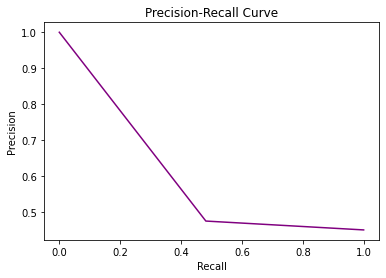

In [398]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [399]:
from sklearn.metrics import roc_curve, roc_auc_score

In [400]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred)

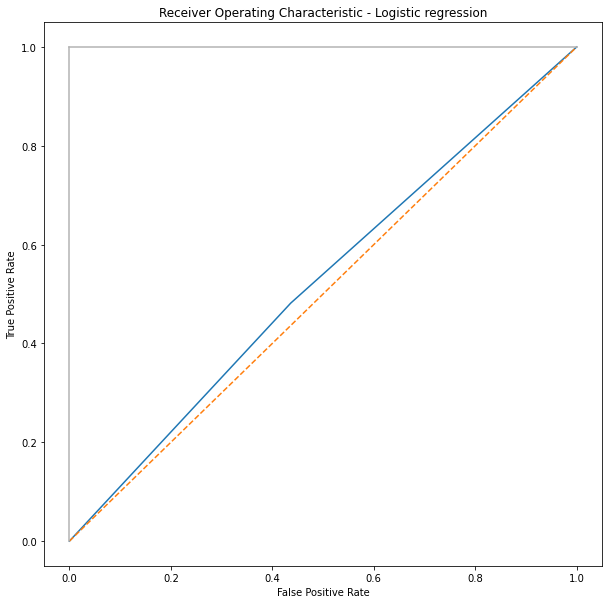

In [401]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KNN

In [414]:
data_knn = main.drop(columns=['client_id', 'datetime','hour','code','type','sum_x'])


In [415]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_knn)
scaled = scaler.fit_transform(data_knn)
scaled_df = pd.DataFrame(scaled, columns=data_knn.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [416]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 3, algorithm='kd_tree')

x,y = data_knn.loc[:,data_knn.columns != 'target'], data_knn.loc[:,'target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


With KNN (K=3) accuracy is:  0.545


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [406]:
main

,client_id,datetime,code,type,sum_x,day,time,hour,target,1711,3000,4111,4112,4121,4214,4511,4722,4789,4812,4814,4816,4829,4899,4900,5039,5099,5199,5200,5211,5231,5251,5261,5300,5311,5331,5399,5411,5422,5441,5451,...,5992,5993,5994,5995,5999,6010,6011,6012,6051,6211,6300,6513,6536,7011,7230,7298,7311,7372,7399,7832,7922,7993,7994,7995,7997,7999,8011,8021,8043,8062,8071,8099,8641,8999,9222,9399,sum_y,0,average,prob
0,96372458,421 06:33:15,6011,2010,-561478.94,421,63315,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1102812.03,13,-84831.694615,50.7
1,21717441,55 13:38:47,6011,2010,-44918.32,55,133847,13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3135792.54,15,-209052.836000,50.7
2,85302434,151 10:34:12,4814,1030,-3368.87,151,103412,10,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-101501.02,8,-12687.627500,56.9
3,31421357,398 00:00:00,5411,1110,-1572.14,398,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-144610.72,25,-5784.428800,52.3
4,84826852,423 15:27:55,6010,7070,5654.99,423,152755,15,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,564185.92,238,2370.529076,47.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4415650,453 15:14:43,6011,2010,-76361.14,453,151443,15,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-76361.14,1,-76361.140000,50.7
5996,82133712,424 13:23:10,6011,2010,-17967.33,424,132310,13,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161705.93,2,80852.965000,50.7
5997,12289409,108 11:13:33,6011,2010,-132509.03,108,111333,11,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-132509.03,1,-132509.030000,50.7
5998,71829751,72 14:50:37,6011,2010,-44918.32,72,145037,14,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-44918.32,1,-44918.320000,50.7


In [408]:
knn = KNeighborsClassifier(n_neighbors = 28, algorithm='kd_tree')

x_train= main.drop(columns=[ 'client_id','datetime','hour','code','type','sum_x','target'])
y_train= main['target']
x_test= yy.drop(columns=[ 'client_id','datetime','target'])
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [417]:
from sklearn.metrics import roc_curve, roc_auc_score

In [418]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, prediction)

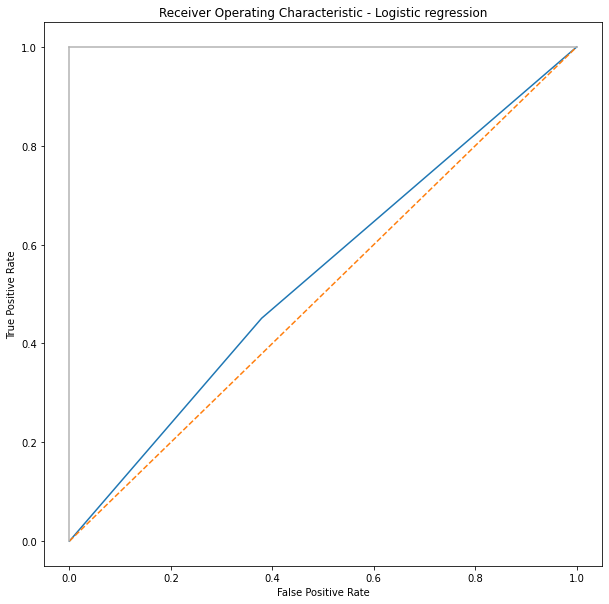

In [419]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Precision recall

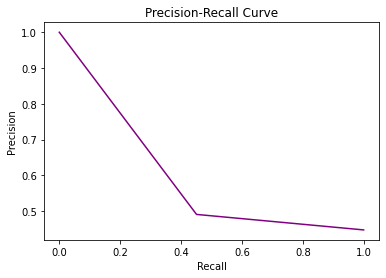

In [420]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, prediction)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [421]:
neig = np.arange(1,30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree', leaf_size=40,)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

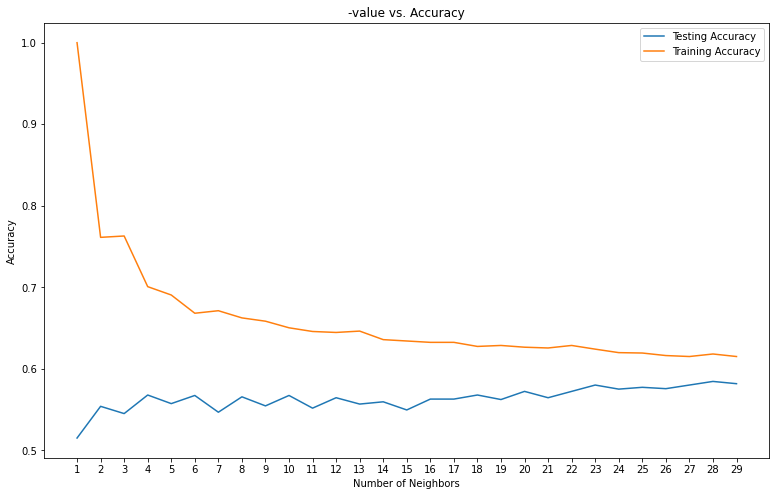

Best Accuracy is 0.5844444444444444 with K = 28


In [422]:
plt.figure(figsize=(13,8))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Random forest

In [429]:
from sklearn.model_selection import train_test_split

X = main.drop(columns=[ 'client_id','datetime','hour','code','type','sum_x','target',1711,3000,4111,4112,4121,4214,4511,4722,4789,4812,4814,4816,4829,4899,4900,5039,5099,5199,5200,5211,5231,5251,5261,5300,5311,5331,5399,5411,5422,5441,5451,5499,5511,5533,5599,5611,5621,5631,5641,5655,5661,5681,5691,5699,5712,5714,5719,5722,5732,5734,5735,5811,5812,5813,5814,5816,5912,5921,5931,5941,5942,5943,5944,5945,5947,5948,5949,5950,5964,5967,5977,5992,5993,5994,5995,5999,6010,6011,6012,6051,6211,6300,6513,6536,7011,7230,7298,7311,7372,7399,7832,7922,7993,7995,7997,7999,8011,8021,8043,8062,8071,8099,8641,8999,9222,9399])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled, columns=X.columns)
y = main['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [430]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=101)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [431]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[726 276]
 [447 351]]
              precision    recall  f1-score   support

         0.0       0.62      0.72      0.67      1002
         1.0       0.56      0.44      0.49       798

    accuracy                           0.60      1800
   macro avg       0.59      0.58      0.58      1800
weighted avg       0.59      0.60      0.59      1800

Accuracy Score: 0.5983333333333334


roc auc

In [426]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)



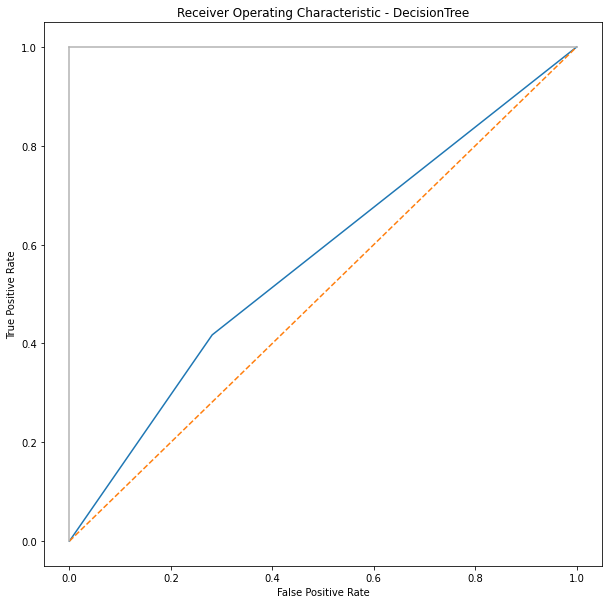

In [427]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

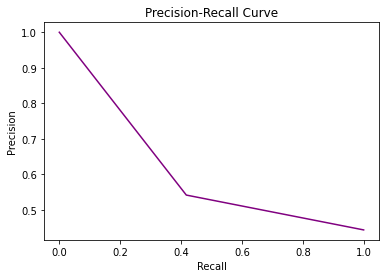

In [428]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

cross validation

In [433]:
X= transactions.drop(['datetime','time','target','sum'], axis =1)
y= transactions['target']

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

In [435]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [436]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [437]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [438]:
print(all_accuracies)

[0.68137255 0.68130072 0.67291247 0.67672531 0.67912196]


In [439]:
print(all_accuracies.mean())

0.678286601965804


In [440]:
print(all_accuracies.std())

0.0031819730835627707


grid search 

In [441]:
from sklearn.model_selection import GridSearchCV

In [442]:
X = main.drop(columns=[ 'client_id','datetime','hour','code','type','sum_x','target'])
y = main['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [443]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

In [ ]:
from sklearn.svm import SVC
scores = ["precision", "recall"]
for score in scores:
  clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
  clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  

In [ ]:
print(clf.best_params_)

In [ ]:
print(gs.best_params_)